In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight

In [5]:
data = pd.read_csv("data_encoded1.csv")

In [6]:
def risk_category(charges):
    if charges < 5000:
        return "faible"
    elif charges < 10000:
        return "moyen"
    else:
        return "eleve"

In [7]:
data["risk"] = data["charges"].apply(risk_category)
data= data[data["age"] <= 30]

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["risk_encoded"] = le.fit_transform(data["risk"])

In [9]:
data

,age,bmi,children,region,charges,sex_male,smoker_yes,risk,risk_encoded
0,19.0,27.90,0.0,3,16884.92400,0,1,eleve,0
1,18.0,33.77,1.0,2,1725.55230,1,0,faible,1
2,28.0,33.00,3.0,2,4449.46200,1,0,faible,1
10,25.0,26.22,0.0,0,2721.32080,1,0,faible,1
12,23.0,34.40,0.0,3,1826.84300,1,0,faible,1
...,...,...,...,...,...,...,...,...,...
1304,18.0,53.13,0.0,2,1163.46270,1,0,faible,1
1318,23.0,33.40,0.0,3,10795.93733,0,0,eleve,0
1321,18.0,31.92,0.0,0,2205.98080,0,0,faible,1
1322,18.0,36.85,0.0,2,1629.83350,0,0,faible,1


In [10]:
X = data.drop(columns=["charges", "risk", "risk_encoded"])
y = data["risk_encoded"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        25
           1       0.89      0.81      0.85        58
           2       0.14      0.50      0.22         4

    accuracy                           0.79        87
   macro avg       0.68      0.70      0.65        87
weighted avg       0.89      0.79      0.83        87



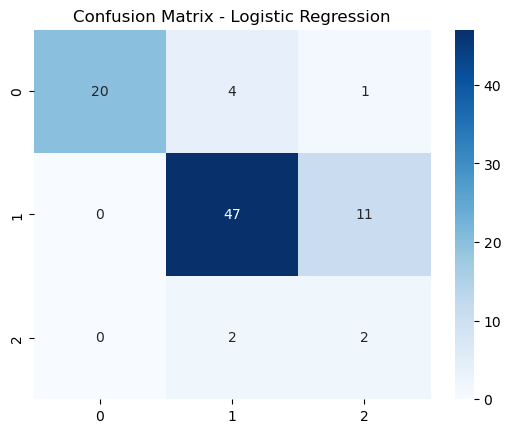

In [13]:
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.86      0.97      0.91        58
           2       0.00      0.00      0.00         4

    accuracy                           0.87        87
   macro avg       0.59      0.59      0.59        87
weighted avg       0.84      0.87      0.85        87



C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


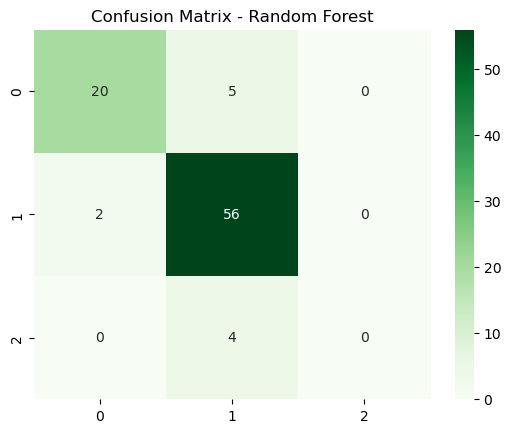

In [14]:
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

C:\Users\tahay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.88      0.91      0.90        58
           2       0.40      0.50      0.44         4

    accuracy                           0.86        87
   macro avg       0.73      0.74      0.73        87
weighted avg       0.87      0.86      0.86        87



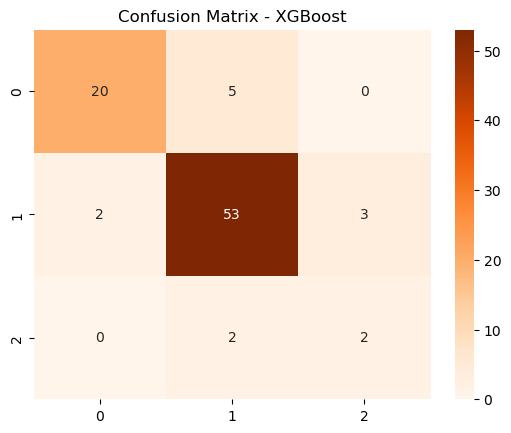

In [15]:
weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train, sample_weight=weights)
y_pred_xgb = xgb_model.predict(X_test)

print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.show()

C:\Users\tahay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.88      0.91      0.90        58
           2       0.40      0.50      0.44         4

    accuracy                           0.86        87
   macro avg       0.73      0.74      0.73        87
weighted avg       0.87      0.86      0.86        87



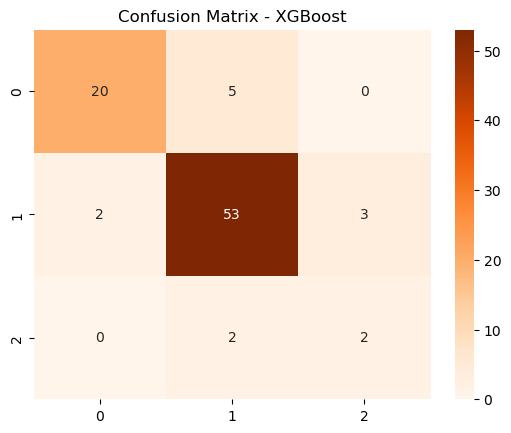

In [16]:
weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train, sample_weight=weights)
y_pred_xgb = xgb_model.predict(X_test)

print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Définir les hyperparamètres à tester
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],        
    'penalty': ['l2'],               
    'solver': ['lbfgs'],             
    'class_weight': ['balanced']     
}

lr = LogisticRegression(max_iter=1000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_macro', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

print("Meilleurs paramètres Logistic Regression :", grid_lr.best_params_)
y_pred_lr = grid_lr.predict(X_test_scaled)


Meilleurs paramètres Logistic Regression : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        25
           1       0.89      0.81      0.85        58
           2       0.14      0.50      0.22         4

    accuracy                           0.79        87
   macro avg       0.68      0.70      0.65        87
weighted avg       0.89      0.79      0.83        87



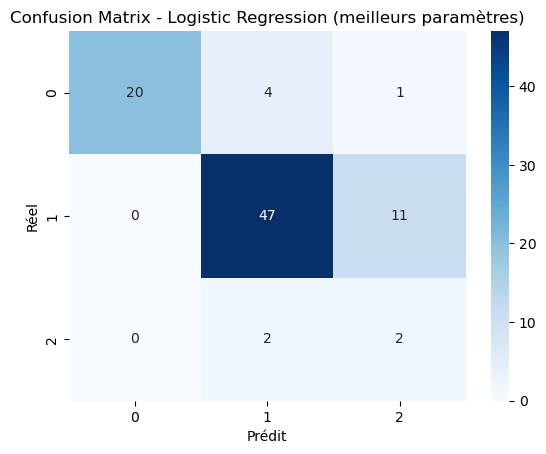

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
best_params = {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

lr_best = LogisticRegression(**best_params, max_iter=1000)
lr_best.fit(X_train_scaled, y_train)  # X_train_scaled si tu as normalisé
y_pred_best = lr_best.predict(X_test_scaled)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (meilleurs paramètres)")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.86      0.98      0.92        58
           2       0.00      0.00      0.00         4

    accuracy                           0.89        87
   macro avg       0.61      0.59      0.60        87
weighted avg       0.85      0.89      0.86        87



C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


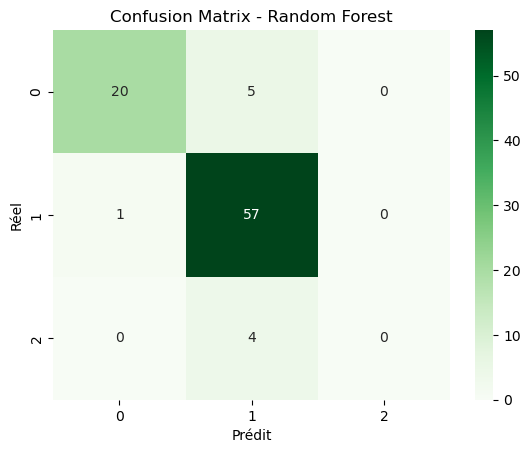

In [19]:
best_params_rf = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 2,
    'class_weight': 'balanced',
    'random_state': 42
}

rf_best = RandomForestClassifier(**best_params_rf)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Meilleurs paramètres Random Forest :", grid_rf.best_params_)

y_pred_rf = grid_rf.predict(X_test)


Meilleurs paramètres Random Forest : {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        25
           1       0.88      0.98      0.93        58
           2       0.50      0.25      0.33         4

    accuracy                           0.90        87
   macro avg       0.79      0.68      0.72        87
weighted avg       0.89      0.90      0.89        87



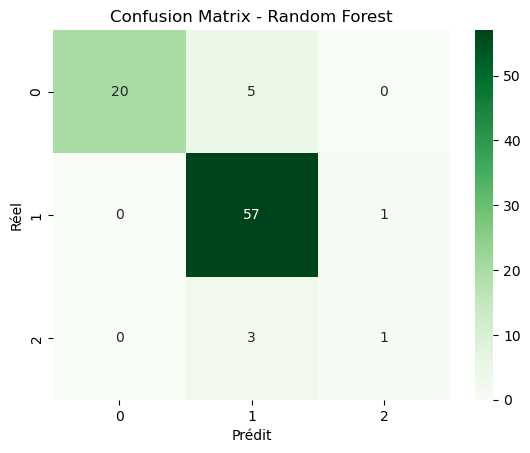

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_params_rf = {
    'class_weight': 'balanced',
    'max_depth': 5,
    'min_samples_split': 5,
    'n_estimators': 100,
    'random_state': 42
}

rf_best = RandomForestClassifier(**best_params_rf)
rf_best.fit(X_train, y_train)

y_pred_rf = rf_best.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train)

param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1]
}

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train, sample_weight=weights)

print("Meilleurs paramètres XGBoost :", grid_xgb.best_params_)

y_pred_xgb = grid_xgb.predict(X_test)


C:\Users\tahay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Meilleurs paramètres XGBoost : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


C:\Users\tahay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        25
           1       0.89      0.93      0.91        58
           2       0.33      0.50      0.40         4

    accuracy                           0.87        87
   macro avg       0.74      0.74      0.73        87
weighted avg       0.89      0.87      0.88        87



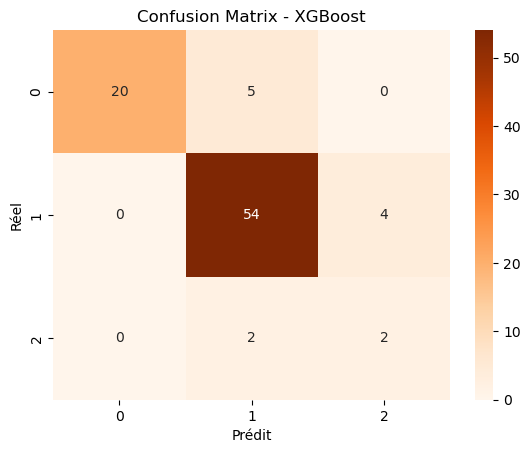

In [23]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import seaborn as sns
import matplotlib.pyplot as plt

weights = compute_sample_weight(class_weight='balanced', y=y_train)

best_params_xgb = {
    'learning_rate': 0.01,
    'max_depth': 5,
    'n_estimators': 200,
    'subsample': 0.8,
    'objective': 'multi:softmax',
    'num_class': len(y.unique()),
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'random_state': 42
}
xgb_best = xgb.XGBClassifier(**best_params_xgb)
xgb_best.fit(X_train, y_train, sample_weight=weights)

y_pred_xgb = xgb_best.predict(X_test)

print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))

# Matrice de confusion
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()



C:\Users\tahay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


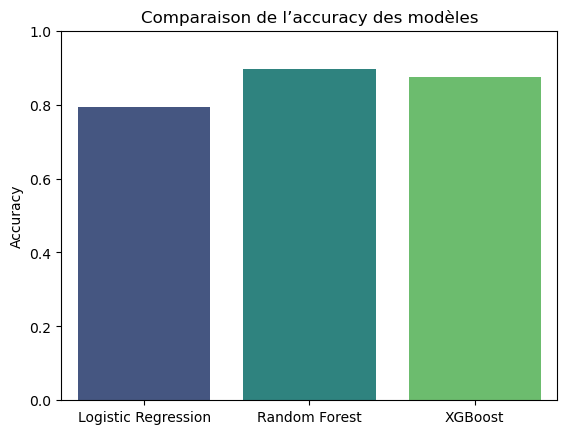

In [24]:
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracies = [
    (y_pred_lr == y_test).mean(),
    (y_pred_rf == y_test).mean(),
    (y_pred_xgb == y_test).mean()
]

sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylabel("Accuracy")
plt.title("Comparaison de l’accuracy des modèles")
plt.ylim(0, 1)
plt.show()

In [25]:
data

,age,bmi,children,region,charges,sex_male,smoker_yes,risk,risk_encoded
0,19.0,27.90,0.0,3,16884.92400,0,1,eleve,0
1,18.0,33.77,1.0,2,1725.55230,1,0,faible,1
2,28.0,33.00,3.0,2,4449.46200,1,0,faible,1
10,25.0,26.22,0.0,0,2721.32080,1,0,faible,1
12,23.0,34.40,0.0,3,1826.84300,1,0,faible,1
...,...,...,...,...,...,...,...,...,...
1304,18.0,53.13,0.0,2,1163.46270,1,0,faible,1
1318,23.0,33.40,0.0,3,10795.93733,0,0,eleve,0
1321,18.0,31.92,0.0,0,2205.98080,0,0,faible,1
1322,18.0,36.85,0.0,2,1629.83350,0,0,faible,1


In [26]:
new_data = pd.DataFrame({
    'age': [19, 18, 28, 25],
    'bmi': [27.90, 33.77, 33.00, 26.22],
    'children': [0, 1, 3, 0],
    'region': [3, 2, 2, 0],
    'sex_male': [0, 1, 1, 1],
    'smoker_yes': [1, 0, 0, 0]
})

In [27]:
new_data_scaled = scaler.transform(new_data)
y_pred_new_lr = lr_best.predict(new_data_scaled)
print("Prédictions Logistic Regression :", y_pred_new_lr)

Prédictions Logistic Regression : [0 1 2 1]


In [28]:
import pandas as pd
features = ['age', 'bmi', 'children', 'region', 'sex_male', 'smoker_yes']


new_data = pd.DataFrame([
    [22, 24.5, 0, 1, 1, 0],   # personne jeune, pas fumeur
    [35, 31.2, 2, 2, 0, 1],   # adulte, fumeur
    [27, 29.8, 1, 3, 1, 0]    # adulte, non fumeur
], columns=features)

print(new_data)

   age   bmi  children  region  sex_male  smoker_yes
0   22  24.5         0       1         1           0
1   35  31.2         2       2         0           1
2   27  29.8         1       3         1           0


In [29]:
y_pred_rf = rf_best.predict(new_data)
print("Prédictions Random Forest :", y_pred_rf)

Prédictions Random Forest : [1 0 1]


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_

print("Meilleurs hyperparamètres KNN :", grid_knn.best_params_)
print("Score KNN (train):", grid_knn.best_score_)
print("Score KNN (test):", best_knn.score(X_test, y_test))


Meilleurs hyperparamètres KNN : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Score KNN (train): 0.718840579710145
Score KNN (test): 0.735632183908046


In [31]:
from sklearn.neighbors import KNeighborsClassifier


knn_final = KNeighborsClassifier(
    n_neighbors=11,
    weights='uniform',
    metric='euclidean'
)

knn_final.fit(X_train, y_train)

print("Score KNN final (train):", knn_final.score(X_train, y_train))
print("Score KNN final (test):", knn_final.score(X_test, y_test))


Score KNN final (train): 0.7130434782608696
Score KNN final (test): 0.6896551724137931


=== Classification Report (KNN) ===
              precision    recall  f1-score   support

           0       0.60      0.12      0.20        25
           1       0.70      0.98      0.81        58
           2       0.00      0.00      0.00         4

    accuracy                           0.69        87
   macro avg       0.43      0.37      0.34        87
weighted avg       0.64      0.69      0.60        87



C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tahay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


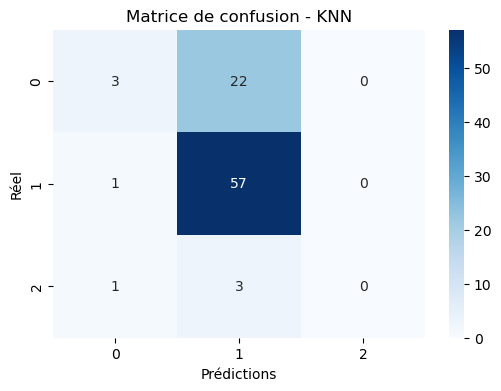

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
=
y_pred_knn = knn_final.predict(X_test)

print("=== Classification Report (KNN) ===")
print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion - KNN")
plt.show()


In [33]:
mes_modeles = {
    "RandomForest": rf_model,
    "XGBoost": xgb_model,
    "LogisticRegression": lr_model,
    "KNN": knn_final
}

import joblib
joblib.dump(mes_modeles, "mes_modeles.joblib")

['mes_modeles.joblib']